In [2]:
from IPython.display import IFrame

IFrame('https://docs.google.com/spreadsheets/d/e/2PACX-1vTjk__2p0MTF5Oh_qmJ9PQpk-QN71HXKzxIYBcvKe09YiGYDD9tL1FlZ7BIiAL2rx_4wdF8mOWziGl9/pubhtml', 800, 350)

In [3]:
import pandas as pd

fifaLink = "https://github.com/DACSS-CSSmeths/Networks_intro/raw/refs/heads/main/casesData/fifa2022.xlsx"
fifa=pd.read_excel(fifaLink,sheet_name='fifa2022')
fifa.head()

,idnum,pos,name,dob,caps,goals,club,group,nationality,age2022
0,1,GK,Hernán Galíndez,1987-03-30,12,0,Aucas,A,Ecuador,35
1,2,DF,Félix Torres,1997-01-11,17,2,Santos Laguna,A,Ecuador,25
2,3,DF,Piero Hincapié,2002-01-09,21,1,Bayer Leverkusen,A,Ecuador,20
3,4,DF,Robert Arboleda,1991-10-22,33,2,São Paulo,A,Ecuador,31
4,5,MF,José Cifuentes,1999-03-12,11,0,Los Angeles FC,A,Ecuador,23


In [ ]:
import networkx as nx

# Create a bipartite graph
B = nx.Graph()

# Add player nodes with bipartite=0
players = fifa['name'].tolist()
B.add_nodes_from(players, bipartite=0, type='player')

# Add country nodes with bipartite=1
countries = fifa['nationality'].unique().tolist()
B.add_nodes_from(countries, bipartite=1, type='country')

# Add edges between players and their countries
for _, row in fifa.iterrows():
    B.add_edge(row['name'], row['nationality'])

# Preview
print(f"Number of nodes: {B.number_of_nodes()}")
print(f"Number of edges: {B.number_of_edges()}")
print("\nSample edges:")
print(list(B.edges())[:5])


Number of nodes: 863
Number of edges: 831

Sample edges:
[('Hernán Galíndez', 'Ecuador'), ('Félix Torres', 'Ecuador'), ('Piero Hincapié', 'Ecuador'), ('Robert Arboleda', 'Ecuador'), ('José Cifuentes', 'Ecuador')]


In [4]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite

fifaLink = "https://github.com/DACSS-CSSmeths/Networks_intro/raw/refs/heads/main/casesData/fifa2022.xlsx"
fifa=pd.read_excel(fifaLink,sheet_name='fifa2022')
fifa.head()

# Step 1: Create the bipartite graph: Club–Country
BC = nx.Graph()

# Add nodes
clubs = fifa['club'].unique().tolist()
countries = fifa['nationality'].unique().tolist()

BC.add_nodes_from(clubs, bipartite=0, type='club')
BC.add_nodes_from(countries, bipartite=1, type='country')

# Add edges between club and country
for _, row in fifa.iterrows():
    club = row['club']
    country = row['nationality']
    BC.add_edge(club, country)

# Step 2: Projected graph: CLUB projection
club_projected = bipartite.weighted_projected_graph(BC, clubs)

# Step 3: Projected graph: COUNTRY projection
country_projected = bipartite.weighted_projected_graph(BC, countries)

# Step 4: Add node attributes (number of players)
club_player_counts = fifa['club'].value_counts().to_dict()
country_player_counts = fifa['nationality'].value_counts().to_dict()

nx.set_node_attributes(club_projected, club_player_counts, "num_players")
nx.set_node_attributes(country_projected, country_player_counts, "num_players")

# Step 5: Save both projected graphs
nx.write_graphml(club_projected, "club_projected.graphml")
nx.write_graphml(country_projected, "country_projected.graphml")


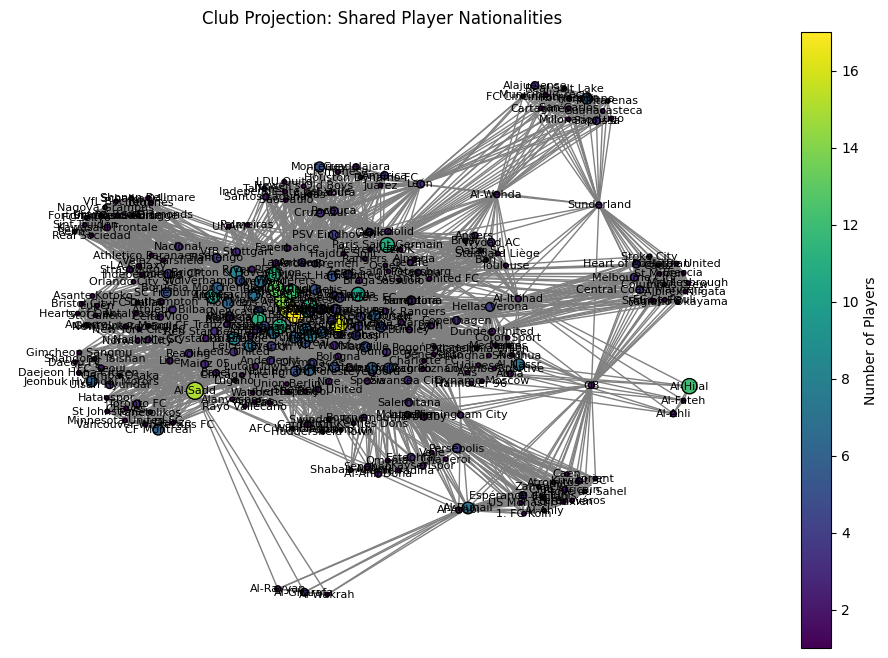

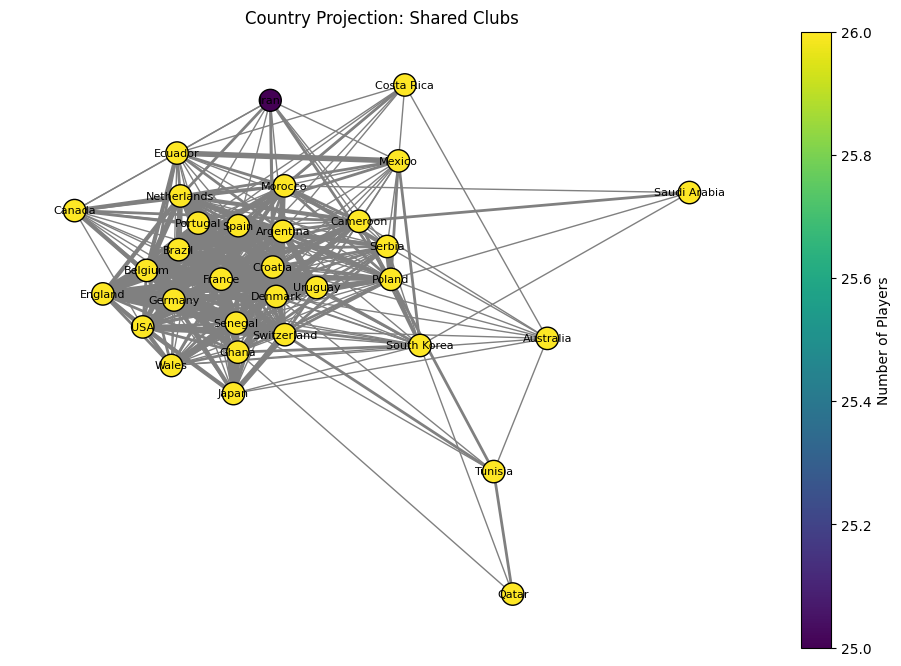

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

def visualize_projection(G, title):
    pos = nx.spring_layout(G, seed=42)

    # Node attribute: number of players
    num_players = [G.nodes[n].get('num_players', 1) for n in G.nodes()]
    sizes = [n * 10 for n in num_players]

    # Normalize and colormap
    norm = colors.Normalize(vmin=min(num_players), vmax=max(num_players))
    cmap = cm.viridis
    node_colors = cmap(norm(num_players))

    # Edge weights
    weights = [G[u][v]['weight'] for u, v in G.edges()]

    # Create plot with explicit Axes
    fig, ax = plt.subplots(figsize=(12, 8))
    nx.draw(G,
            pos,
            ax=ax,
            with_labels=True,
            node_size=sizes,
            node_color=node_colors,
            edge_color='gray',
            width=weights,
            edgecolors='black',
            font_size=8)

    # Add colorbar to same Axes
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Number of Players')

    ax.set_title(title)
    plt.axis('off')
    plt.show()

# Visualize both projections
visualize_projection(club_projected, "Club Projection: Shared Player Nationalities")
visualize_projection(country_projected, "Country Projection: Shared Clubs")


In [6]:
# Save club-projected graph with attributes
nx.write_graphml(club_projected, "club_projected.graphml")

# Save country-projected graph with attributes
nx.write_graphml(country_projected, "country_projected.graphml")

# Optional: download them from Colab
from google.colab import files
files.download("club_projected.graphml")
files.download("country_projected.graphml")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>